# Polynomial Derivatives

$ p_t = c_0 + c_1 t + c_2 t^2 + c_3 t^3 + c_4 t^4\dots + c_n t^n = \sum\limits_{k=0}^{n} c_k t^k$

$\dot{p_t} = c_1 + c_2 2 t + c_3 3 t^2 + c_4 3 t^3 + \dots + c_n n t^n = \sum\limits_{k=1}^{n} c_k k t^{k-1}$

$\ddot{p_t} = c_2 2 + c_3 6 t + c_4 12 t^2\dots = \sum\limits_{k=2}^{n} c_k k(k-1) t^{k-2}$

$\ddot{p_t} = c_3 6 + c_4 28 t\dots = \sum\limits_{k=3}^{n} c_k k(k-1)(k-2) t^{k-3}$

$p_t^{(m)} = \sum\limits_{k=m}^{n} c_{k} \frac{!k}{!(k-m)} t^{k-m}$

# Polynomial Derivatives with Time Scaling

$ \beta = t/T$

$ \dot{\beta} = 1/T$

$ p_\beta = c_0 + c_1 \beta + c_2 \beta^2 + c_3 \beta^3 + c_4 \beta^4\dots = \sum\limits_{k=0}^{n} c_k \beta^k$

$ \dot{p_{\beta}} = \dfrac{\partial p}{\partial \beta} \dfrac{d \beta}{dt} = (c_1 + c_2 2 \beta + c_3 3 \beta^2 + c_4 4 \beta^3\dots) /T = \sum\limits_{k=1}^{n} c_k k \beta^{k-1}/T$

$p_{\beta}^{(m)} = \dfrac{\partial^m p}{\partial \beta^m} \left(\dfrac{d \beta}{dt}\right)^m = \sum\limits_{k=m}^{n} c_{k} \frac{!k}{!(k-m)} \beta^{k-m}/ T^m$

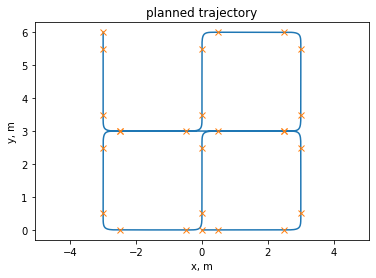

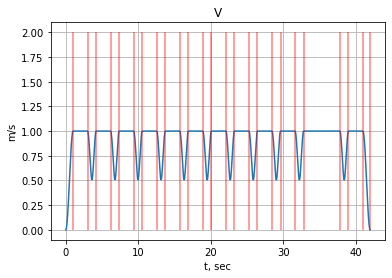

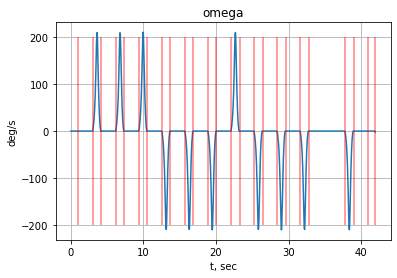

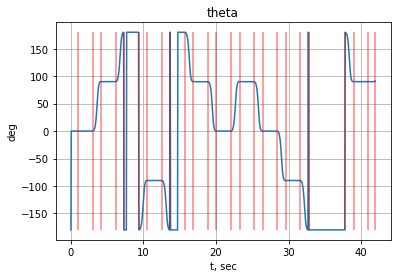

In [1]:
from rover_planning import RoverPlanner, simulate_rover, plot_rover_sim
import matplotlib.pyplot as plt
import numpy as np

v  = 1
r = .5
planner = RoverPlanner(x=0, y=0, v=v, theta=0, r=r)
planner.goto(3, 0, v, r)
planner.goto(3, 3, v, r)
planner.goto(0, 3, v, r)
planner.goto(0, 0, v, r)
planner.goto(-3, 0, v, r)
planner.goto(-3, 3, v, r)
planner.goto(0, 3, v, r)
planner.goto(0, 6, v, r)
planner.goto(3, 6, v, r)
planner.goto(3, 3, v, r)
planner.goto(-3, 3, v, r)
planner.goto(-3, 6, v, r)
planner.stop(-3, 6)

ref_data = planner.compute_ref_data(plot=True)

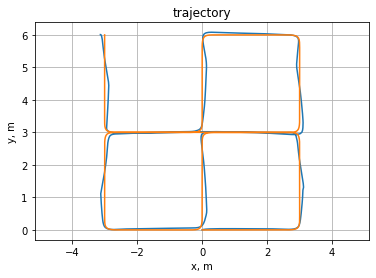

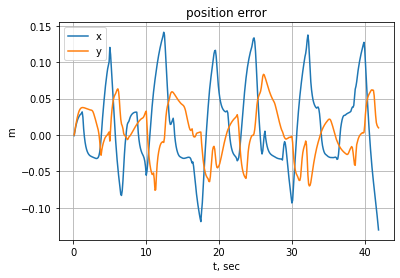

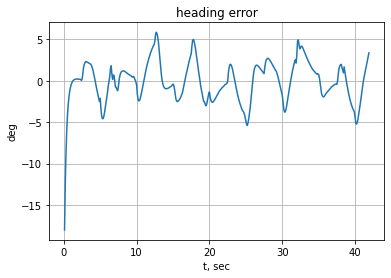

In [2]:
res = simulate_rover(planner=planner,freq_d = 0.2, w1 = .1, w2 = .1, x0 = 0, y0 = 0, theta0 = np.pi/10, dist = 'square', sol = None) # t, x, y, theta, ref_data, freq_d, w1, w2, dist, sol
plot_rover_sim(res=res, planner=planner)

In [3]:
res

  message: 'Required step size is less than spacing between numbers.'
     nfev: 20078
     njev: 0
      nlu: 0
      sol: None
   status: -1
  success: False
        t: array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 1

In [4]:
y_vect = res['y']

In [5]:
y_vect.shape

(3, 385)

In [19]:
y_vect

array([[ 0.00000000e+00,  8.32878828e-01,  1.83095021e+00,
         2.66836676e+00,  2.87632897e+00,  2.91758368e+00,
         2.92848172e+00,  2.59743215e+00,  1.68759990e+00,
         6.98925123e-01,  6.53389758e-02, -3.03889184e-03,
         6.57649270e-03, -5.72180440e-02, -5.90453231e-01,
        -1.56991987e+00, -2.52919793e+00, -2.97260510e+00,
        -3.00078992e+00, -2.99923139e+00, -2.84653105e+00,
        -2.13361482e+00, -1.13391257e+00, -2.62664398e-01,
         9.31157003e-04,  4.58780424e-03,  1.36435097e-02,
         2.92540536e-01,  1.15335732e+00,  2.15212420e+00,
         2.87450836e+00,  3.00419559e+00,  3.00388233e+00,
         2.96036463e+00,  2.50236097e+00,  1.53811326e+00,
         5.44643961e-01, -4.50647408e-01, -1.44224376e+00,
        -2.42896302e+00, -2.97958885e+00, -3.02750442e+00,
        -3.02318519e+00, -3.01797117e+00],
       [ 0.00000000e+00,  1.68450779e-01,  2.22618645e-01,
         2.88206985e-01,  8.19495278e-01,  1.76403462e+00,
         2.67

In [21]:
[y_vect[0, :] for i in range(len(y_vect))]

[array([ 0.00000000e+00,  8.32878828e-01,  1.83095021e+00,  2.66836676e+00,
         2.87632897e+00,  2.91758368e+00,  2.92848172e+00,  2.59743215e+00,
         1.68759990e+00,  6.98925123e-01,  6.53389758e-02, -3.03889184e-03,
         6.57649270e-03, -5.72180440e-02, -5.90453231e-01, -1.56991987e+00,
        -2.52919793e+00, -2.97260510e+00, -3.00078992e+00, -2.99923139e+00,
        -2.84653105e+00, -2.13361482e+00, -1.13391257e+00, -2.62664398e-01,
         9.31157003e-04,  4.58780424e-03,  1.36435097e-02,  2.92540536e-01,
         1.15335732e+00,  2.15212420e+00,  2.87450836e+00,  3.00419559e+00,
         3.00388233e+00,  2.96036463e+00,  2.50236097e+00,  1.53811326e+00,
         5.44643961e-01, -4.50647408e-01, -1.44224376e+00, -2.42896302e+00,
        -2.97958885e+00, -3.02750442e+00, -3.02318519e+00, -3.01797117e+00]),
 array([ 0.00000000e+00,  8.32878828e-01,  1.83095021e+00,  2.66836676e+00,
         2.87632897e+00,  2.91758368e+00,  2.92848172e+00,  2.59743215e+00,
         1

In [20]:
len(y_vect)

3

In [23]:
x, y, theta = [y_vect[i, :] for i in range(len(y_vect))]